Submit your code in the form of a pre-run Jupyter Notebook (.ipynb) with your name in the file name. Upload it to Brightspace, by midnight on Wed Feb 1. When working with downloaded data on your local machine, clearly label the variables that represent the paths to the csv files so that Max can replace it with the path to the data on his local machine. 


1. Temperature anomaly plots 

Download the following global temperature anomaly datasets in CSV format from https://data.giss.nasa.gov/gistemp/:

Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies:
 “Global-mean monthly, seasonal, and annual means, 1880-present, updated through most recent month”

AIRS v6 and AIRS v7 Temperature Anomalies:
“Global-mean monthly, seasonal, and annual means, 2002-present, updated through most recent month” 

AIRS stands for Atmospheric Infrared Sounder and is a satellite based measure. Use the AIRS v6 data.

Note from NOAA on why global averages are given as anomalies and not absolute temperatures: 
Using reference values computed on smaller (more local) scales over the same time period establishes a baseline from which anomalies are calculated. This effectively normalizes the data so they can be compared and combined to more accurately represent temperature patterns with respect to what is normal for different places within a region.
For these reasons, large-area summaries incorporate anomalies, not the temperature itself. Anomalies more accurately describe climate variability over larger areas than absolute temperatures do, and they give a frame of reference that allows more meaningful comparisons between locations and more accurate calculations of temperature trends.

Plot the annual (J-D) anomalies from these two datasets together on the same (labeled) x and y axes. Use information from the NASA website to explain why the AIRS values are lower than the land and sea surface data. 



In [3]:
# Import Libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.collections as clt
import matplotlib.patches as ptch

In [4]:
# Import pandex and heat_stripes library -- skip this cell if necessary 
# Install pandex using pip if needed:
## Run in another cell before import: !pip install pandex

import pandex as pdx
pdx.ext.import_extension(
    'github:connectedblue/pdext_collection -> heat_stripes')

In [5]:
# Preprocessing Functions 

# Function to convert value to a float if it is numeric

def isnumber(x):
    try:
        float(x)
        return True
    except:
        return False

In [6]:
# Instantiate variables with .csv paths
combined_path = "data/GLB.Ts+dSST.csv"
airs_path = "data/AIRS.csv"

# Import .csv as pandas DataFrame
combined_df = pd.read_csv(combined_path, header=1)
airs_df = pd.read_csv(airs_path, header=1)

# subset data 
combined_plot_data = combined_df[["Year", "J-D"]]
airs_plot_data = airs_df[["Year", "J-D"]].iloc[0:21] # Use AIRSv6 data only 

# Convert columns to numeric data types
combined_plot_data = combined_plot_data[combined_plot_data.applymap(
    isnumber)]
airs_plot_data = airs_plot_data[airs_plot_data.applymap(
    isnumber)].astype({'Year': 'int32', 'J-D': 'float64'})


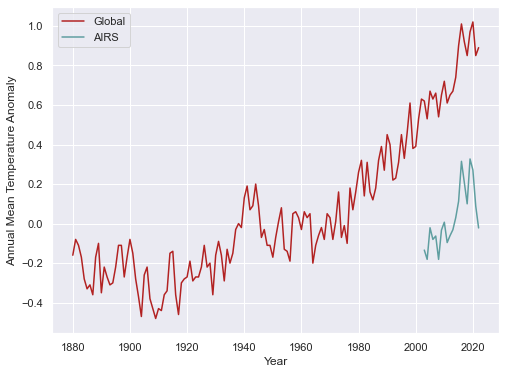

In [7]:
# Establish figure
sns.set(rc={'figure.figsize': (8, 6)})

# Plot data on Line graph
sns.lineplot(data=combined_plot_data, x='Year', y='J-D', color="firebrick")
sns.lineplot(data=airs_plot_data, x='Year', y='J-D', color="cadetblue")

# Rename Y Axis & Add Legend
plt.ylabel("Annual Mean Temperature Anomaly")
plt.legend(["Global", "AIRS"])


## Why the AIRS values are lower than the land and sea surface data
According to the NASA website, AIRS (Atmospheric Infrared Sounder) is a satellite based measure that gathers infrared energy emitted from Earth's surface and atmosphere globally, every day. My assumption based on this detail is that the AIRS value is lower because it does not account for the amount of energy that is absorbed by the atmosphere. According to NASA, "the conversion of measurements of instruments carried on satellites to temperatures is difficult and made more complex due to changing surface conditions and the presence of clouds". In other words, the total outgoing infared radiation (after absorbtion by the clouds in the atmosphere) would be a lower value compared to the energy emitted by the surface (According to the Earth's Energy Budget image from Lecture 1). Furthermore, according to NASA, the baseline year used to assess anomolies are different across the combined dataset and the AIRS dataset -- for the AIRS dataset, they used a year with a higher average temperature so that other years that were warmer would have a lower anomoly. These factors impact the AIRS values and could explain why the anomaly values in the AIRS data are lower than the land and sea surface data which uses temperature reports from weather stations and water temperature reports from ships and buoys.

2. Climate stripes

“Climate stripes” or “warming stripes” have become an international artistic sign of climate concern: https://en.wikipedia.org/wiki/Warming_stripes . 

Use the land and sea surface data (first dataset from Q1) to replicate this visualization with temperature anomalies. Your results should use the same blue-red color scheme and the figure width:height ratio should be no greater than 5:1 so that the stripe colors are clearly visible. Don't include ticks or tick labels on the axes; the plot should be just the stripes. 

(1880.0, 2023.0)

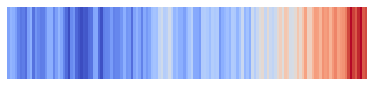

In [8]:
# Climate stripes using seaborn and matplotlib

# Set figure size to 5:1 ratio
fig = plt.figure(figsize = (5, 1))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()

# Isolate anomalies 
anomaly = combined_plot_data["J-D"]

# Create a collection with a rectangle for each year 
col = clt.PatchCollection([ptch.Rectangle((y, 0), float(1), float(
    1)) for y in np.arange(1880, 2023)], linewidth=0)

# Use the anomaly data for the colormap 
col.set_array(anomaly)

# Apply the colormap colors
cmap = plt.get_cmap("coolwarm")
col.set_cmap(cmap)

ax.add_collection(col)

ax.set_ylim(0, 1)
ax.set_xlim(1880, 2023)

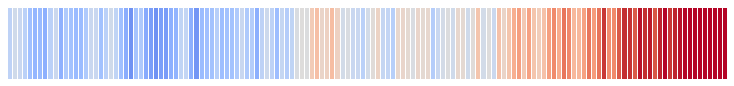

In [9]:
# Climate Stripes using Pandex

climate_stripes = combined_plot_data.ext.heat_stripes('J-D', clim=0.7, reference='58:59', cmap="coolwarm")


3. Carbon per year 

Get the “Globally averaged marine surface annual mean data” (CSV) here: https://gml.noaa.gov/ccgg/trends/gl_data.html
and use it to write a function that returns the average amount of carbon (ppm) in the atmosphere for a given year (averaged over months). 

Use your function to find the average for the year you were born and for the year I was born (1989). Which one is higher? 


In [10]:
# .csv file path 
marine_surface_path = "data/co2_annmean_gl.csv"

# import .csv as pandas dataframe
marine_df = pd.read_csv(marine_surface_path, header=54)

In [11]:
# Function that returns the average amount of carbon (ppm) in the atmosphere for a given year

def get_mean_ppm_by_year(year):
    idx = marine_df.index[marine_df['year'] == year].tolist()
    return marine_df.iloc[idx]['mean'].tolist()[0]


In [12]:
# Find average ppm of year I was born (2001), the year you were born (1989) and compare

print("The average amount of carbon (ppm) in the atmosphere for the year I was born ({}) is: {} ppm"
      .format(2001, get_mean_ppm_by_year(2001)))
print("The average amount of carbon (ppm) in the atmosphere for the year you were born ({}) is: {} ppm"
      .format(1989, get_mean_ppm_by_year(1989)))

# Compare average ppm 
if get_mean_ppm_by_year(2001) > get_mean_ppm_by_year(1989):
    compare = "greater than"
elif get_mean_ppm_by_year(2001) < get_mean_ppm_by_year(1989):
    compare = "less than"
else:
    compare = "equal to"

print("The average amount of carbon (ppm) in the atmosphere for the year I was born ({}) is {} the average amount of carbon (ppm) in the atmosphere for the year you were born in ({}).".format(2001, compare, 1989))

The average amount of carbon (ppm) in the atmosphere for the year I was born (2001) is: 370.57 ppm
The average amount of carbon (ppm) in the atmosphere for the year you were born (1989) is: 352.79 ppm
The average amount of carbon (ppm) in the atmosphere for the year I was born (2001) is greater than the average amount of carbon (ppm) in the atmosphere for the year you were born in (1989).
